In [107]:
import math

from scipy.io import arff
from operator import index

import numpy as np
from sklearn.neighbors import NearestNeighbors, KernelDensity
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import scipy.stats
from scipy.stats import expon, skew
from scipy import integrate
import seaborn as sns
import math
plt.rcParams['figure.figsize'] = [15, 7]

# 1

In [108]:
arff_file = arff.loadarff('./clusters/artificial/cluto-t4-8k.arff')
#arff_file = arff.loadarff('./clusters/real-world/iris.arff')
df = pd.DataFrame(arff_file[0])

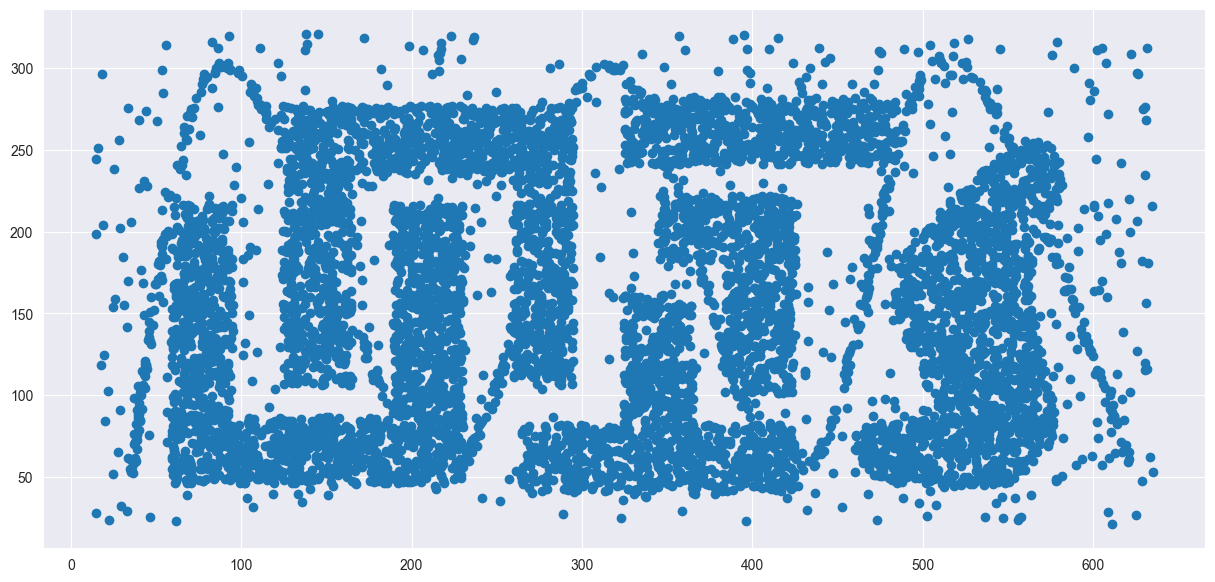

In [109]:
plt.scatter(df.iloc[:,0],df.iloc[:,1])
plt.show()

In [110]:
X = df.iloc[:,:2].values
y = df.iloc[:,2].values
le = LabelEncoder()
y = le.fit_transform(y)
def main(X,y,n):
    nn = NearestNeighbors(n_neighbors=n)
    nn.fit(X, y)
    dist, knn = nn.kneighbors(X)  # returns N index neighbors including self
    return knn, dist

knn, distReturn = main(X,y,35)

In [111]:
def generateArr(newDist, median='median'):
    arr = []
    for x in newDist:  # finds the distance away from that point (index 0)
        if median == 'median':
            arr += [np.median(x)]
        elif median == 'sum': # min + median + max
            arr += [x[1]+np.max(x)+np.median(x)]
        elif median == 'max':
            arr += [np.max(x)]
        elif median == 'minMax':
            arr += [np.max(x)+x[1]]
        elif median == 'medMax':
            arr += [np.median(x)+np.max(x)]
        elif median == 'min':
            arr += [x[1]]
            

    return arr

distReturn = np.array(distReturn)
arr = generateArr(distReturn, median="max")

4.502627637714651


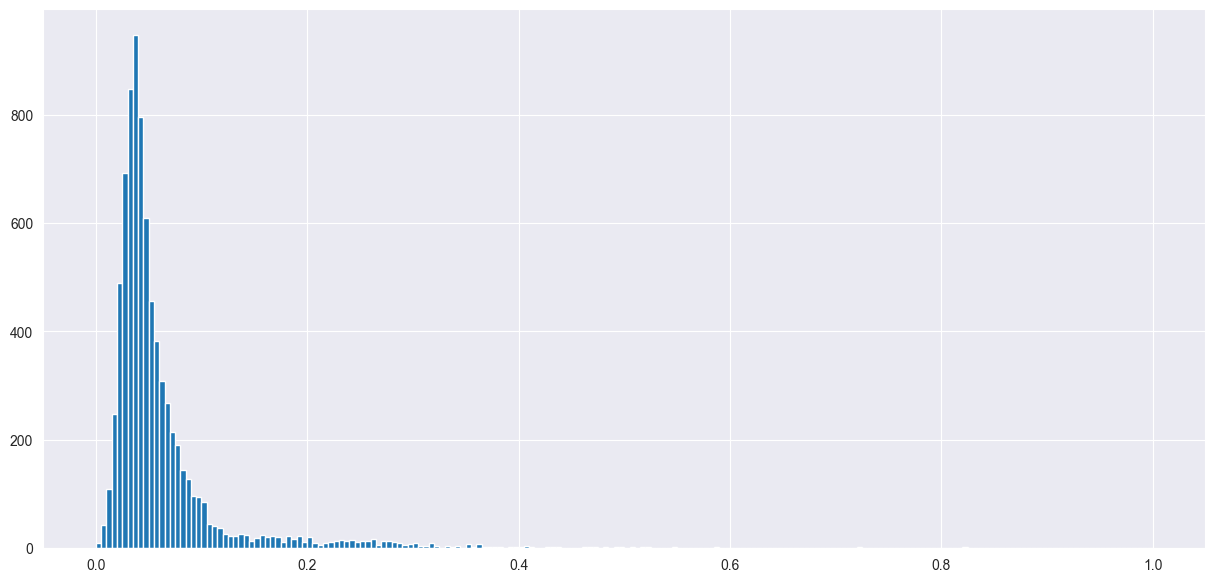

In [112]:
arr = (arr - np.min(arr)) / (np.max(arr) - np.min(arr))
print(skew(arr))
plt.hist(arr,bins=200)
plt.show()

In [113]:
means = np.mean(arr)
inMean = 1/means

In [114]:
ker = -means*np.log(1-.88)
print(-means*np.log(1-.88))
f = integrate.quad(lambda x: inMean*np.exp(-x*inMean), 0, ker)
print(f)

0.13629260114844954
(0.8799999999999999, 9.769962616701376e-15)


[ True  True  True ...  True  True  True]


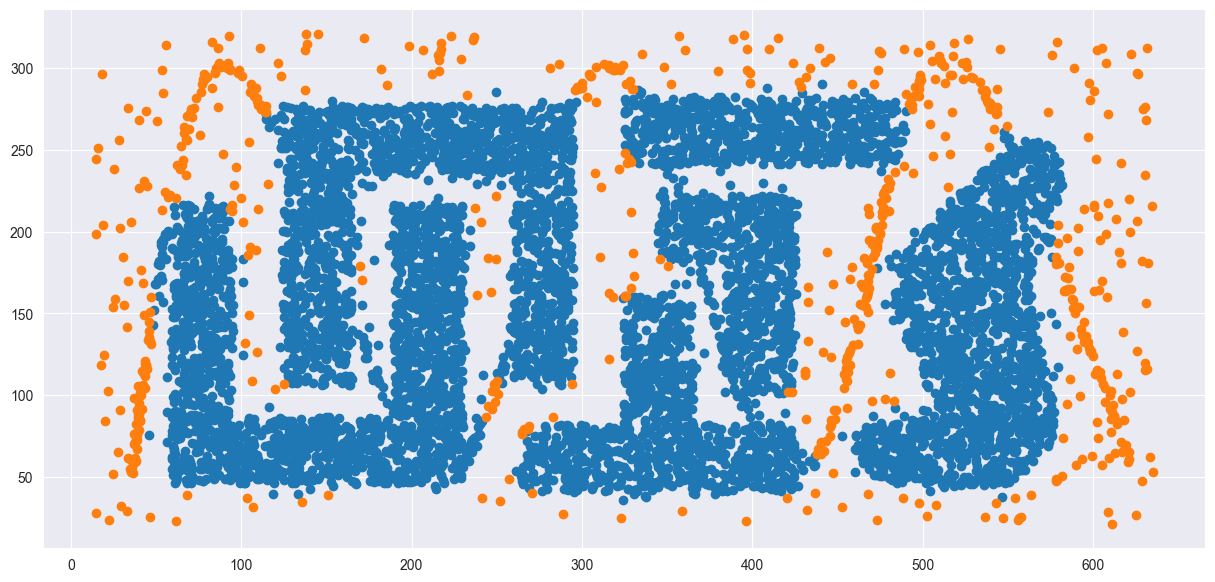

In [115]:
newArr = arr < ker
print(newArr)
plt.scatter(X[newArr,0],X[newArr,1])
plt.scatter(X[~newArr,0],X[~newArr,1])
plt.show()

In [116]:
print(X[newArr].shape,X[~newArr].shape)

(7360, 2) (640, 2)


In [117]:
print((y[~newArr] == 6).sum(),(y[~newArr] != 6).sum())

606 34


# 1

# 2

In [118]:
arff_file = arff.loadarff('./clusters/artificial/cluto-t7-10k.arff')
#arff_file = arff.loadarff('./clusters/real-world/iris.arff')
df3 = pd.DataFrame(arff_file[0])
df3.tail()

,x,y,CLASS
9995,451.783997,372.544006,b'6'
9996,550.674988,327.447998,b'1'
9997,474.742004,161.518005,b'3'
9998,535.835022,375.765991,b'1'
9999,234.878006,181.878006,b'8'


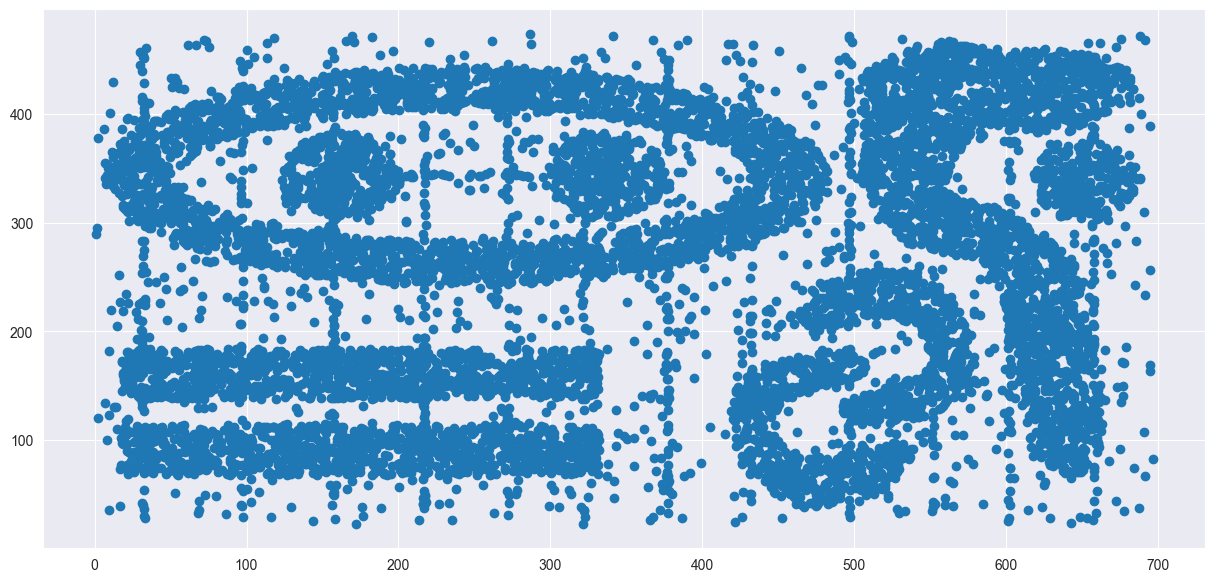

In [119]:
plt.scatter(df3['x'],df3['y'])
plt.show()

In [120]:
X = df3.iloc[:,:2].values
y = df3.iloc[:,2].values
le = LabelEncoder()
y = le.fit_transform(y)
def main(X,y,n):
    nn = NearestNeighbors(n_neighbors=n)
    nn.fit(X, y)
    dist, knn = nn.kneighbors(X)  # returns N index neighbors including self
    return knn, dist

knn, distReturn = main(X,y,35)

In [121]:
def generateArr(newDist, median='median'):
    arr = []
    for x in newDist:  # finds the distance away from that point (index 0)
        if median == 'median':
            arr += [np.median(x)]
        elif median == 'sum':  # min + median + max
            arr += [x[1] + np.max(x) + np.median(x)]
        elif median == 'max':
            arr += [np.max(x)]
        elif median == 'minMax':
            arr += [np.max(x) + x[1]]
        elif median == 'medMax':
            arr += [np.median(x) + np.max(x)]
        elif median == 'min':
            arr += [x[1]]

    return arr


distReturn = np.array(distReturn)
arr = generateArr(distReturn, median="max")
arr = (arr - np.min(arr)) / (np.max(arr) - np.min(arr))

0.2587328328359233
(0.88, 9.769962616701378e-15)
[ True  True  True ...  True  True  True]


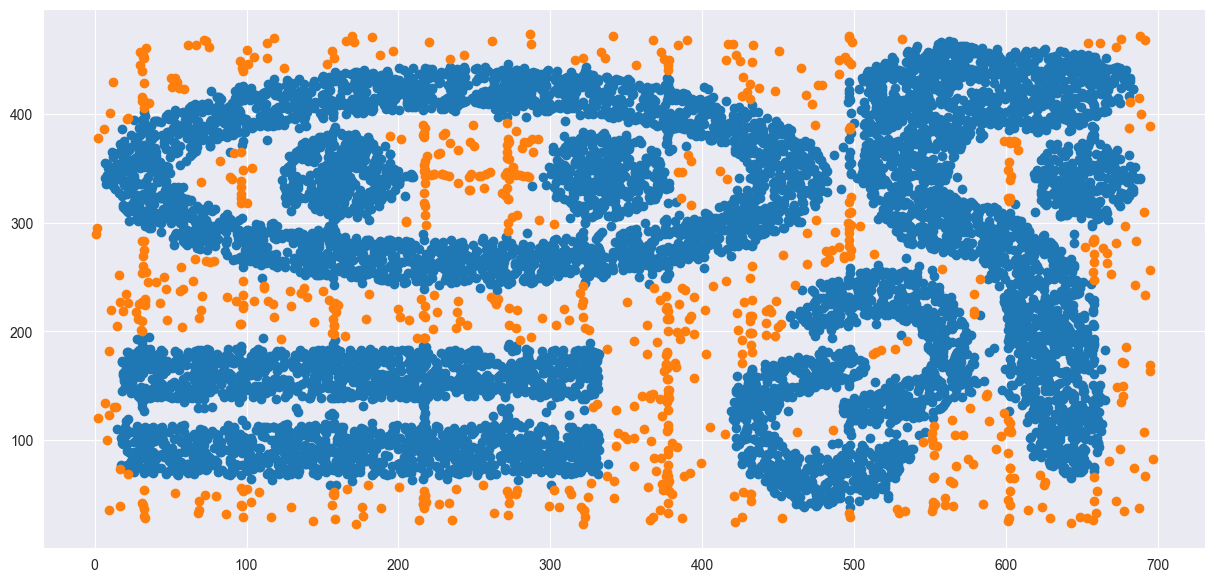

In [122]:
means = np.mean(arr)
inMean = 1 / means
ker = -means * np.log(1 - .88)
print(-means * np.log(1 - .88))
f = integrate.quad(lambda x: inMean * np.exp(-x * inMean), 0, ker)
print(f)
newArr = arr < ker
print(newArr)
plt.scatter(X[newArr, 0], X[newArr, 1])
plt.scatter(X[~newArr, 0], X[~newArr, 1])
plt.show()

In [123]:
print(X[newArr].shape, X[~newArr].shape)
print((y[~newArr] == 9).sum(), (y[~newArr] != 9).sum())
y.max()

(9284, 2) (716, 2)
697 19


9

# 2

# 3

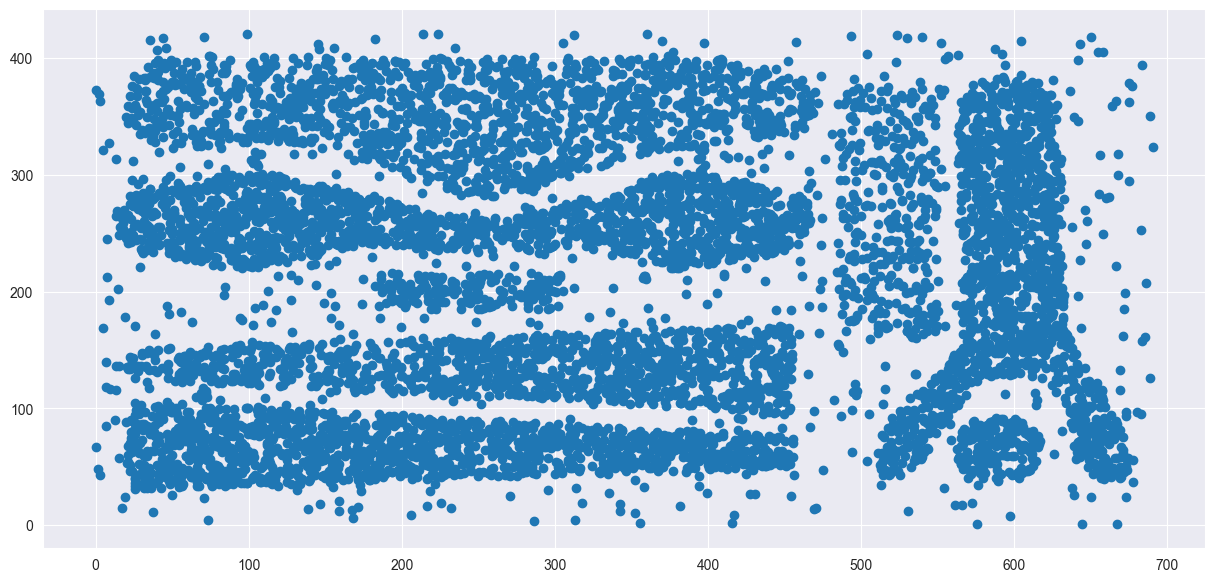

0.28091740534542736
(0.92, 1.021405182655144e-14)
[ True  True  True ...  True  True  True]


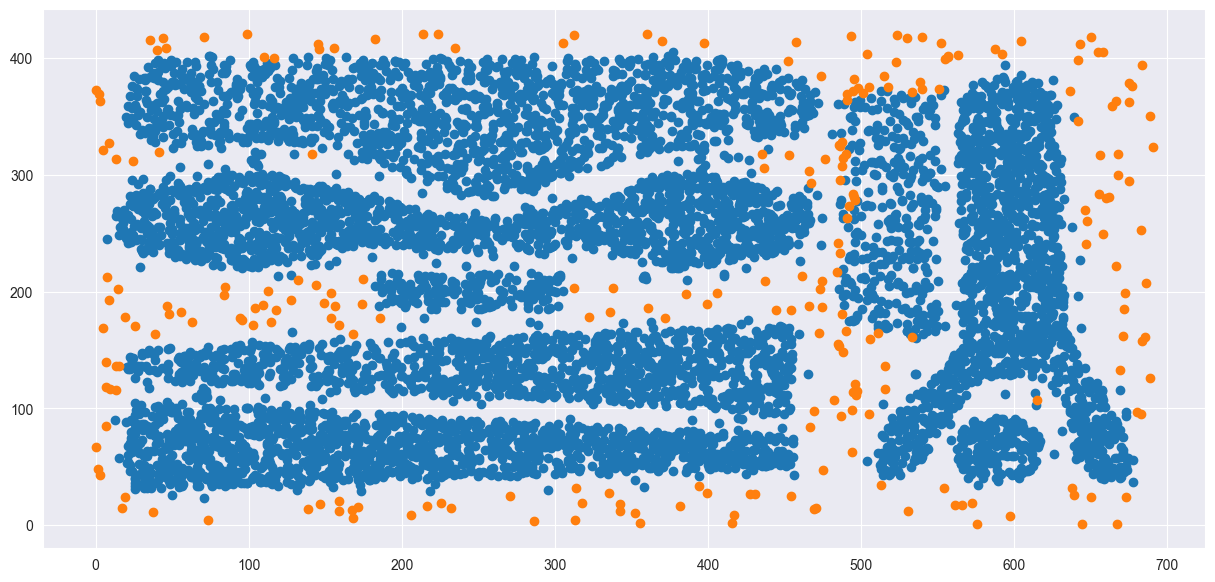

In [126]:
arff_file = arff.loadarff('./clusters/artificial/cluto-t8-8k.arff')
#arff_file = arff.loadarff('./clusters/real-world/iris.arff')
df3 = pd.DataFrame(arff_file[0])
df3.tail()
plt.scatter(df3['x'], df3['y'])
plt.show()
X = df3.iloc[:, :2].values
y = df3.iloc[:, 2].values
le = LabelEncoder()
y = le.fit_transform(y)


def main(X, y, n):
    nn = NearestNeighbors(n_neighbors=n)
    nn.fit(X, y)
    dist, knn = nn.kneighbors(X)  # returns N index neighbors including self
    return knn, dist


knn, distReturn = main(X, y, 35)


def generateArr(newDist, median='median'):
    arr = []
    for x in newDist:  # finds the distance away from that point (index 0)
        if median == 'median':
            arr += [np.median(x)]
        elif median == 'sum':  # min + median + max
            arr += [x[1] + np.max(x) + np.median(x)]
        elif median == 'max':
            arr += [np.max(x)]
        elif median == 'minMax':
            arr += [np.max(x) + x[1]]
        elif median == 'medMax':
            arr += [np.median(x) + np.max(x)]
        elif median == 'min':
            arr += [x[1]]

    return arr


distReturn = np.array(distReturn)
arr = generateArr(distReturn, median="max")
arr = (arr - np.min(arr)) / (np.max(arr) - np.min(arr))
means = np.mean(arr)
inMean = 1 / means
ker = -means * np.log(1 - .92)
print(-means * np.log(1 - .92))
f = integrate.quad(lambda x: inMean * np.exp(-x * inMean), 0, ker)
print(f)
newArr = arr < ker
print(newArr)
plt.scatter(X[newArr, 0], X[newArr, 1])
plt.scatter(X[~newArr, 0], X[~newArr, 1])
plt.show()

In [127]:
print(X[newArr].shape, X[~newArr].shape)
print((y[~newArr] == 8).sum(), (y[~newArr] != 8).sum())
y.max()

(7749, 2) (251, 2)
209 42


8